Dataset reading

In [144]:
import pandas as pd
file_path="/content/protein functions.csv"
df=pd.read_csv(file_path)
print(df.head())

    mcg   gvh   alm   mit  erl  pox   vac   nuc name
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT


Dataset evaluation

In [145]:
print(df.shape)

(1484, 9)


In [146]:
print(df.columns)

Index(['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'name'], dtype='object')


In [147]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB
None


In [148]:
print(df.describe())

               mcg          gvh          alm          mit          erl  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min       0.110000     0.130000     0.210000     0.000000     0.500000   
25%       0.410000     0.420000     0.460000     0.170000     0.500000   
50%       0.490000     0.490000     0.510000     0.220000     0.500000   
75%       0.580000     0.570000     0.550000     0.320000     0.500000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               pox          vac          nuc  
count  1484.000000  1484.000000  1484.000000  
mean      0.007500     0.499885     0.276199  
std       0.075683     0.057797     0.106491  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.480000     0.220000  
50%       0.000000     0.510000     0.220000  
75% 

In [149]:
print(df.shape)

(1484, 9)


Taking target variable and features

In [150]:
X = df.drop(['name'], axis=1)
y=df['name']
print(X.shape)
print(y.shape)

(1484, 8)
(1484,)


Scatter plot

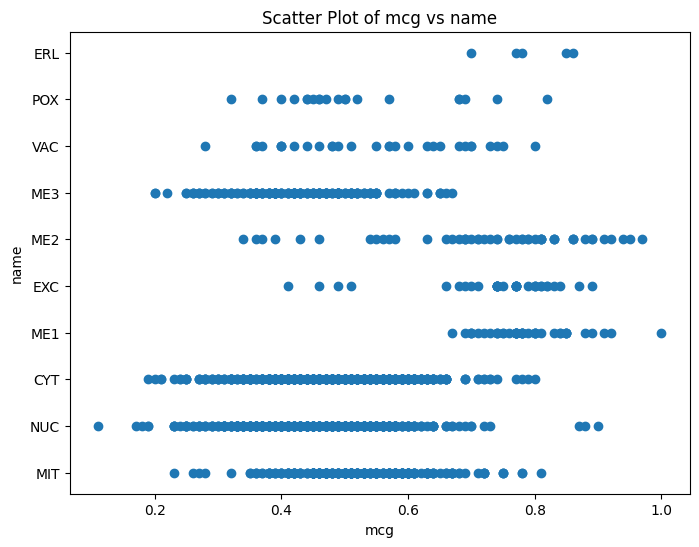

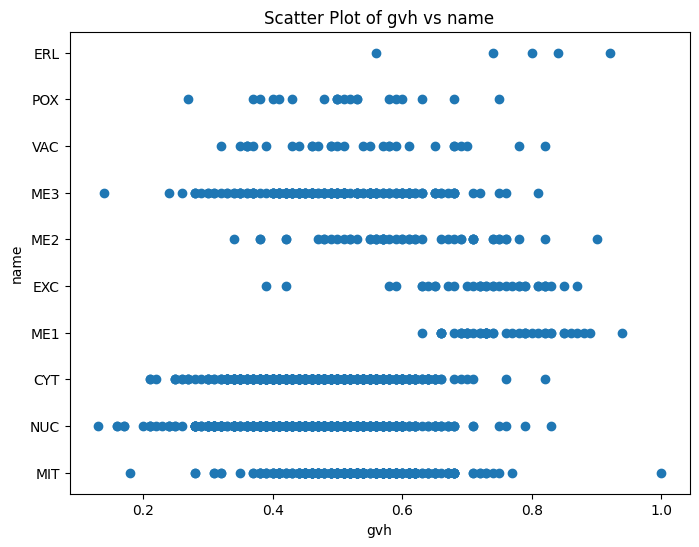

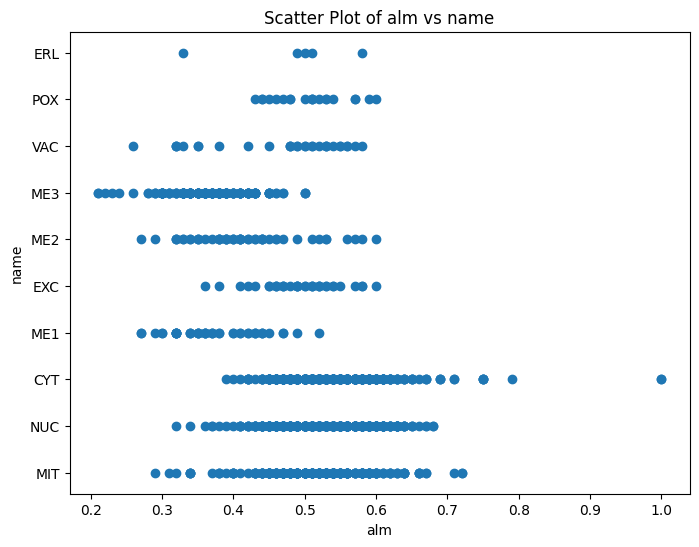

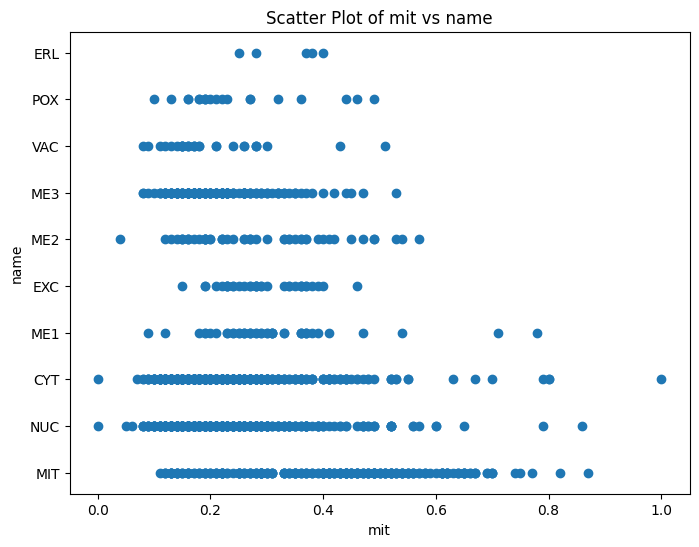

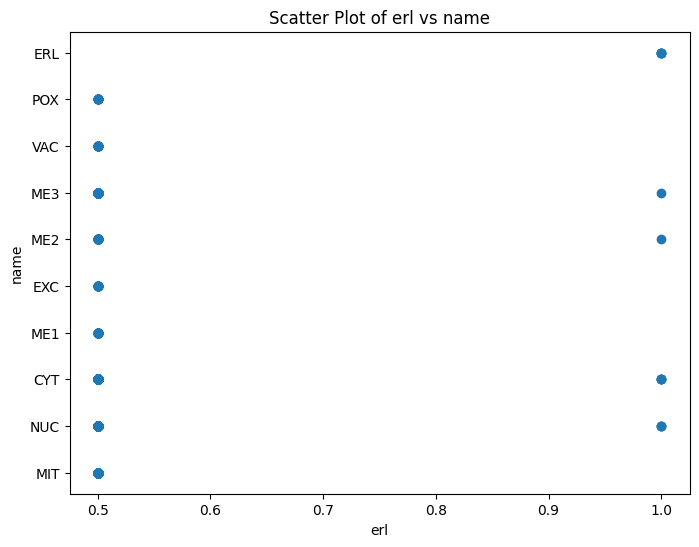

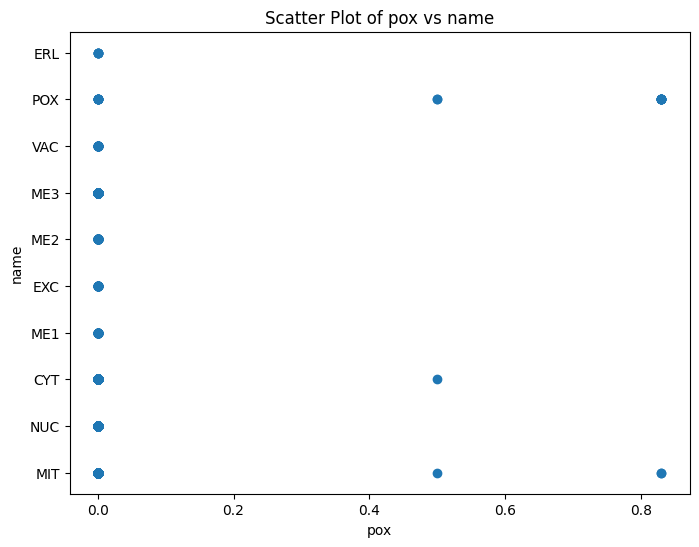

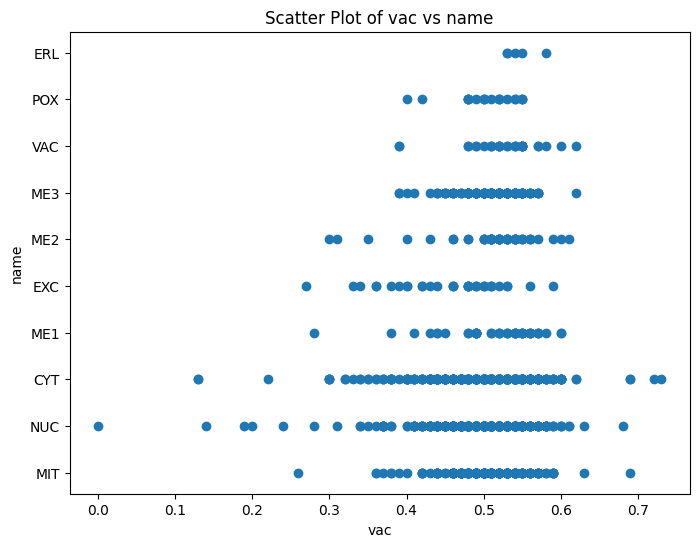

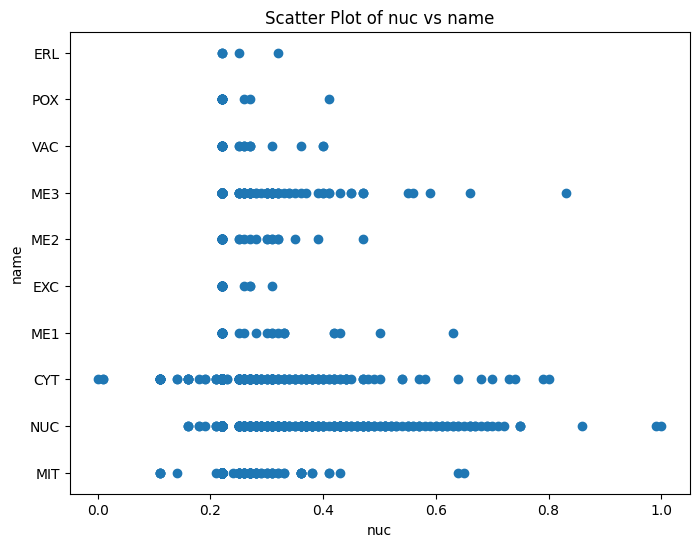

In [151]:
import matplotlib.pyplot as plt
for col in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('name')
    plt.title(f'Scatter Plot of {col} vs name')
    plt.show()


Histograms

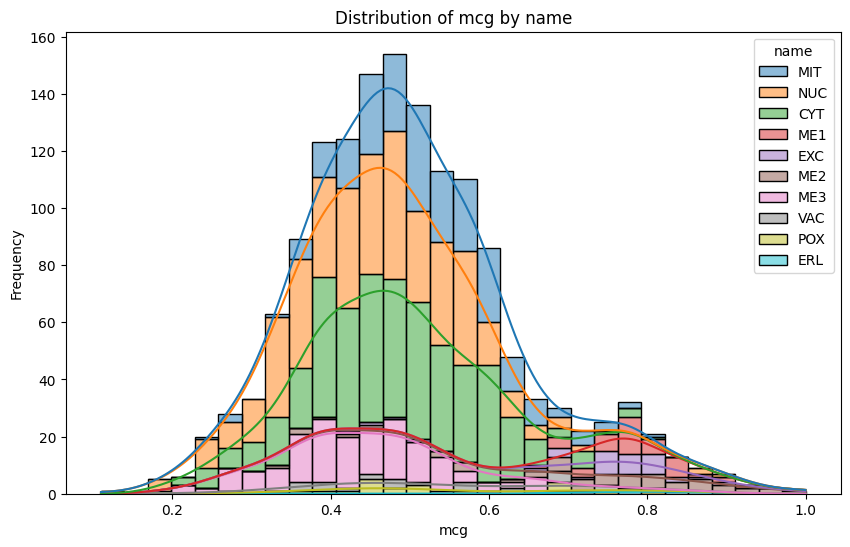

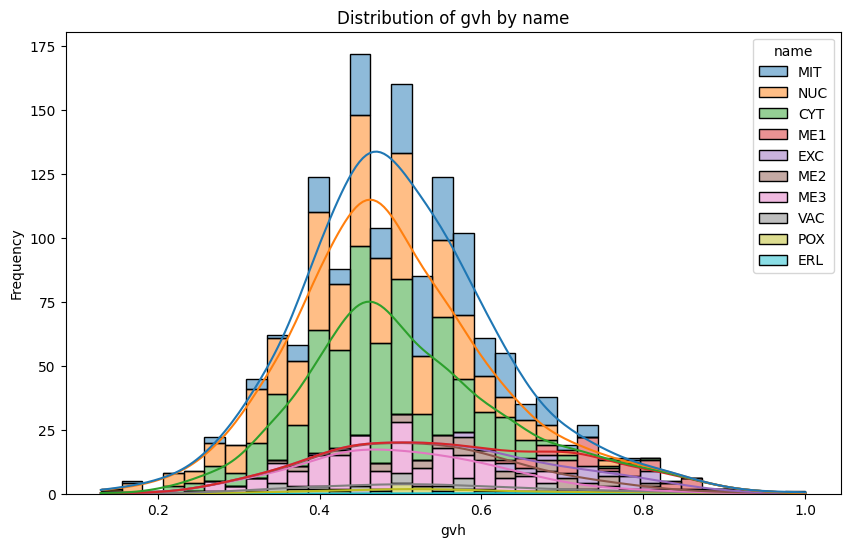

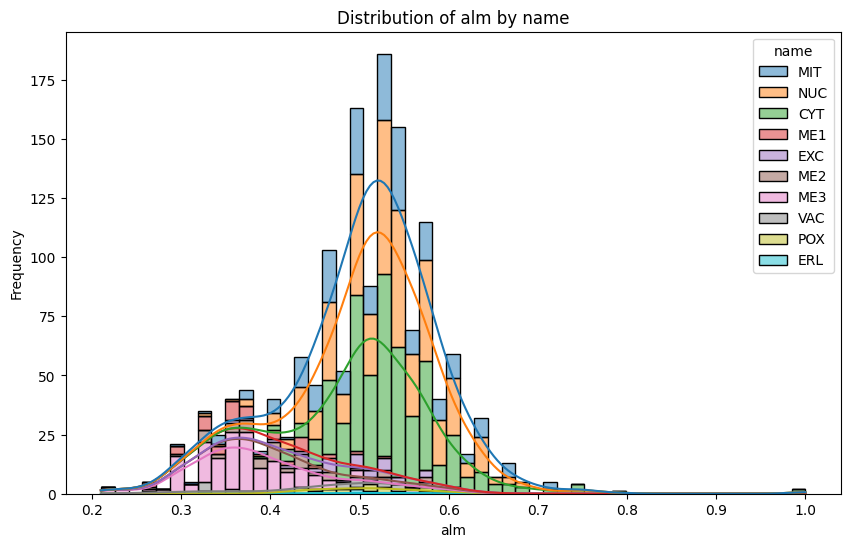

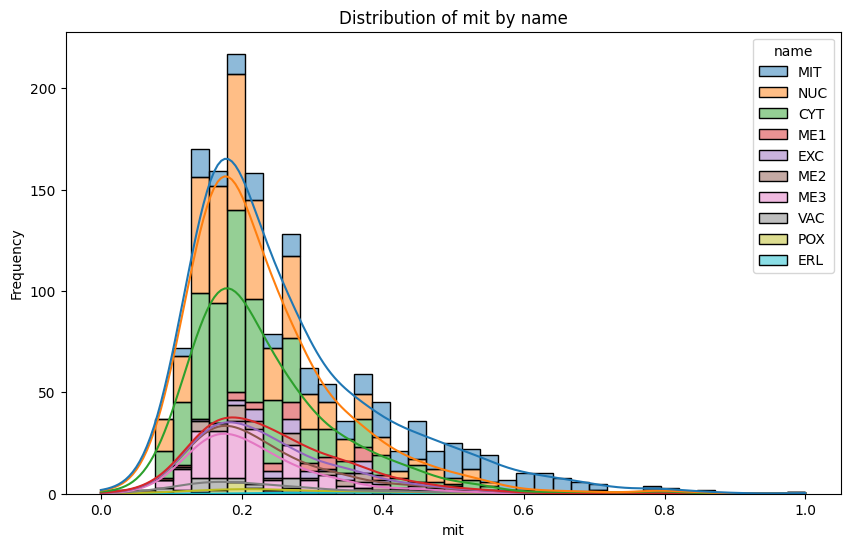

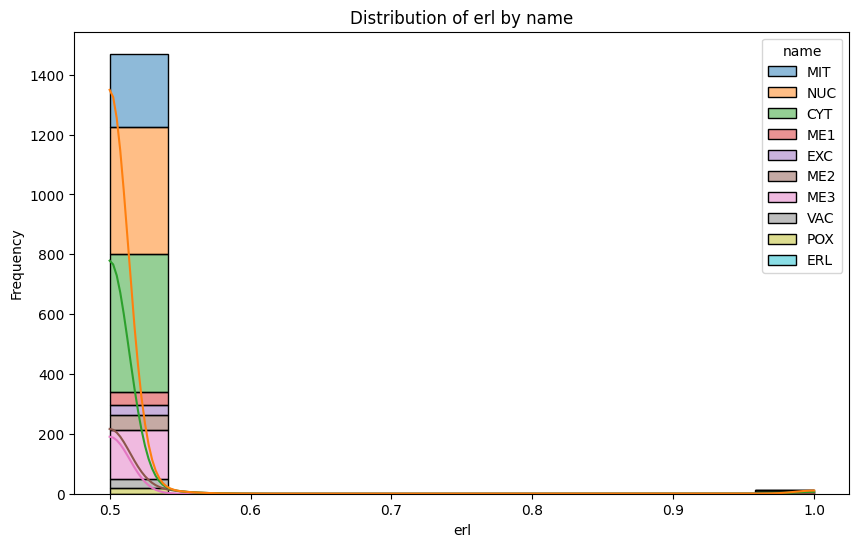

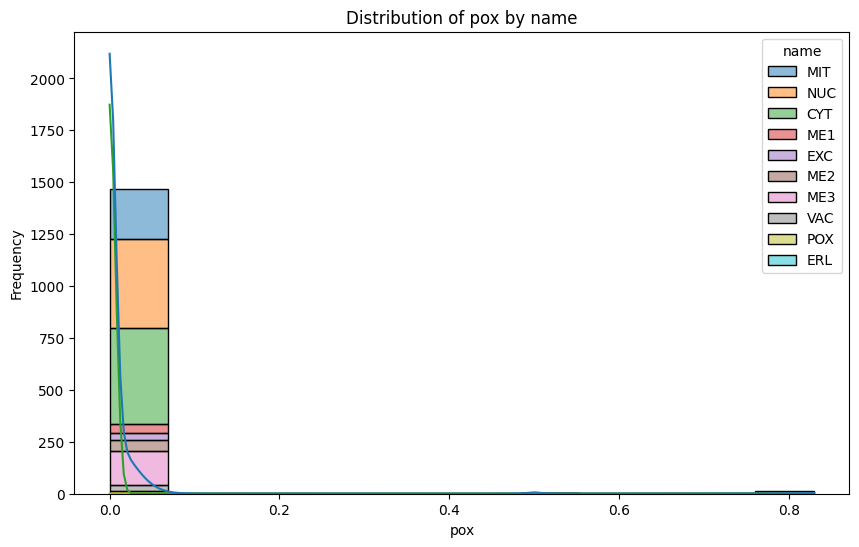

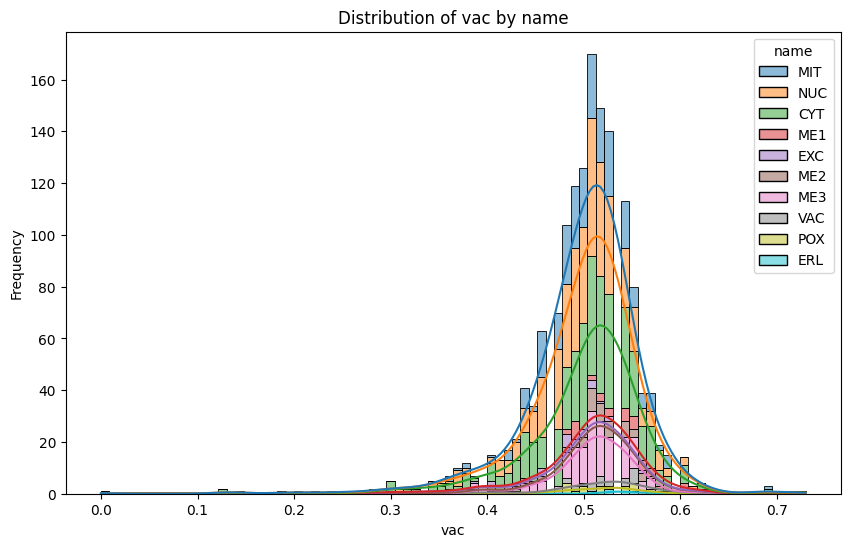

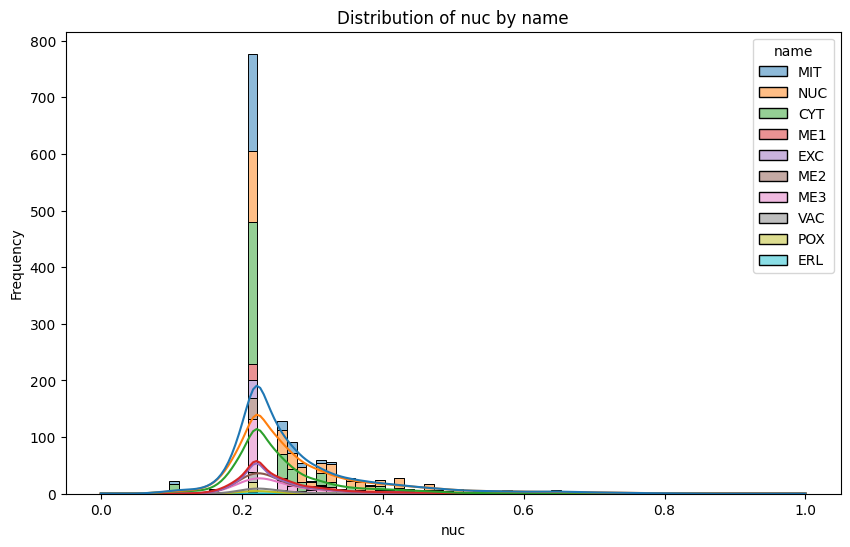

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
for col in X.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=col, hue='name', data=pd.concat([X[col], y], axis=1), multiple="stack", kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col} by name')
    plt.show()


Box plots

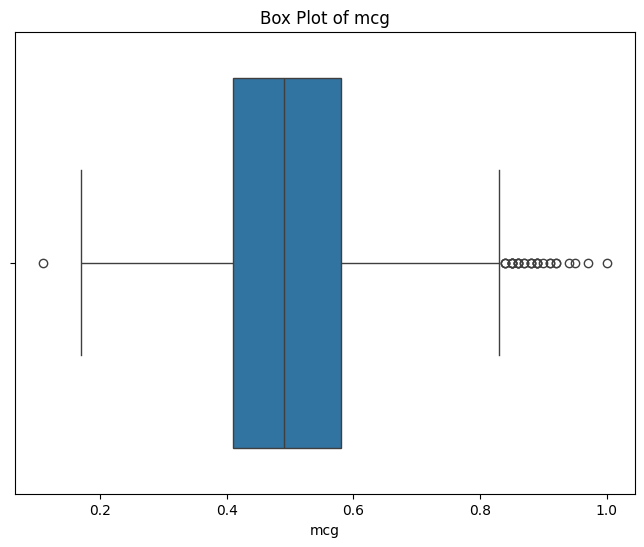

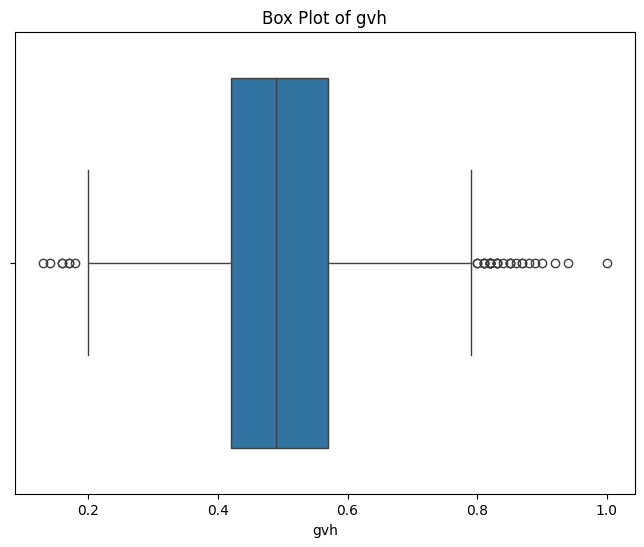

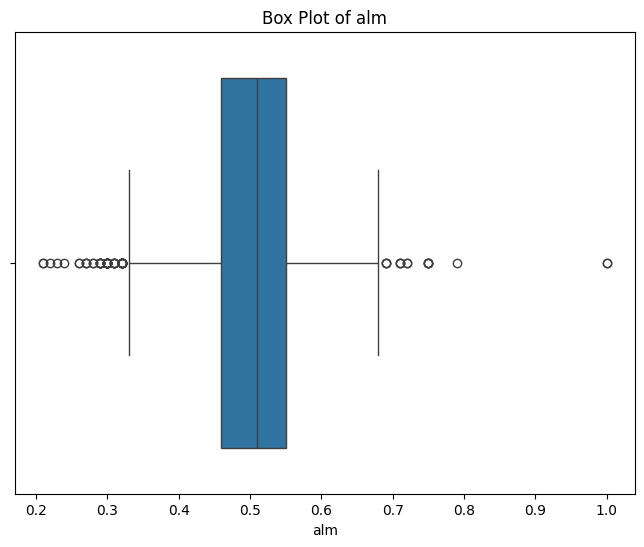

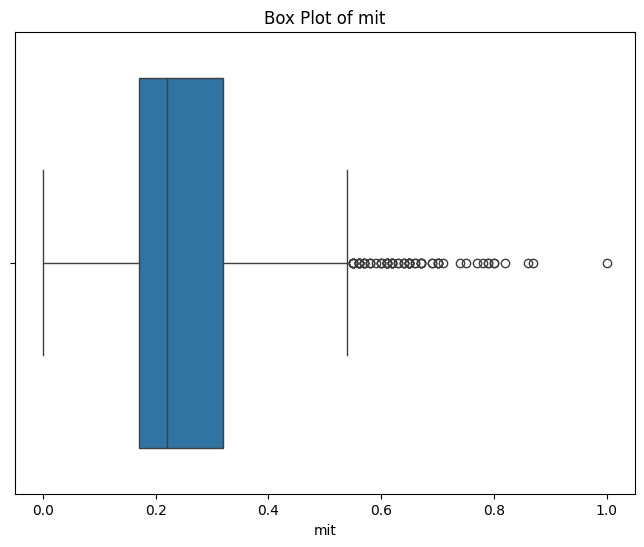

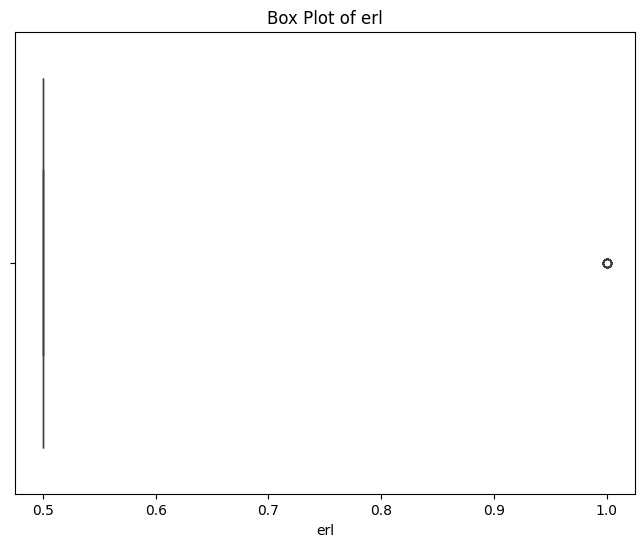

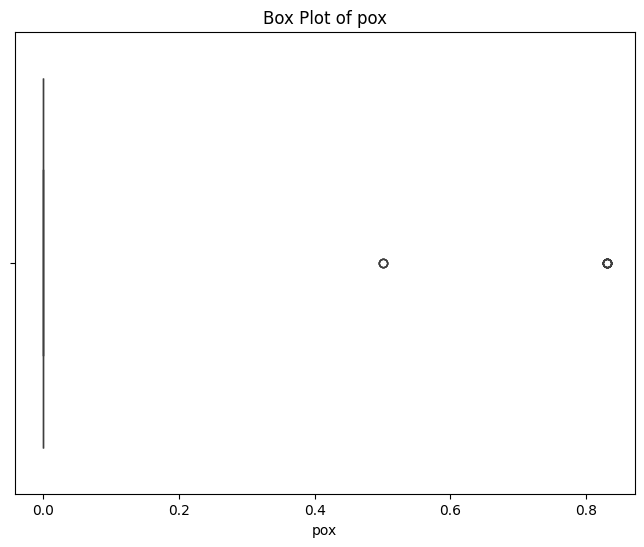

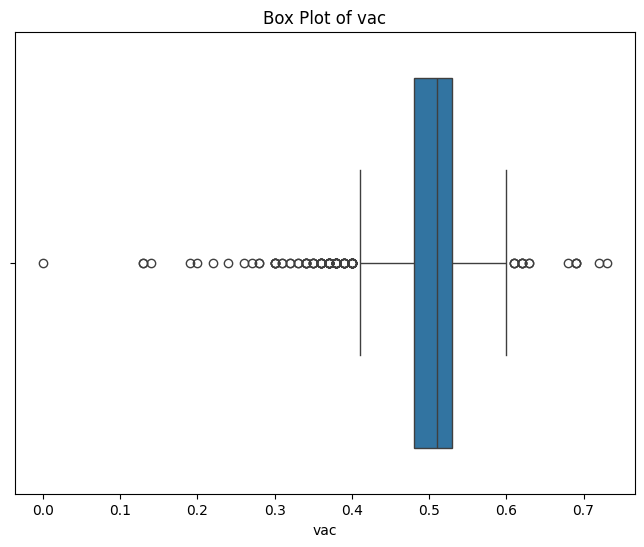

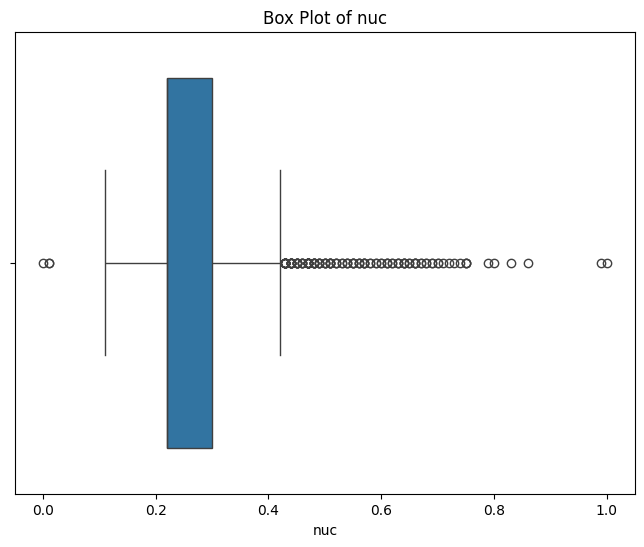

In [153]:
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


Converting string values in target variable to int

In [154]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


Pre processing

In [155]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-1.3953286  -0.40172937 -0.00459302 ... -0.10297836 -0.1539046
  -0.51394319]
 [-0.01244734 -0.40172937 -0.23175607 ... -0.10297836  0.01746947
  -0.12905324]
 [-0.01244734 -1.127042    0.33615156 ... -0.10297836  0.87433984
   0.83317163]
 ...
 [-0.37636346  0.24299297  0.10898851 ... -0.10297836  0.36021762
  -0.51394319]
 [-0.66749636 -0.40172937 -0.45891913 ... -0.10297836  0.01746947
   4.10473619]
 [ 0.35146878 -0.80468083  1.35838531 ... -0.10297836 -2.21039348
   0.06339173]]
[[ 6.42601675e-01  8.07125020e-01 -1.18174546e-01 ... -1.02978362e-01
   5.31591691e-01  3.52059192e-01]
 [-3.76363462e-01  4.84763850e-01  1.08988509e-01 ... -1.02978362e-01
   7.02965765e-01 -5.13943191e-01]
 [ 4.97035227e-01  1.22209374e-03 -1.14040829e+00 ... -1.02978362e-01
  -4.96652748e-01 -5.13943191e-01]
 ...
 [-1.24976215e+00 -1.04645171e+00  4.49733091e-01 ... -1.02978362e-01
   5.31591691e-01 -3.28307559e-02]
 [ 6.42601675e-01  1.37125707e+00  4.49733091e-01 ... -1.02978362e-01
  -3.25278675e

Target value wise rows

In [156]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(367), np.int64(1): np.int64(5), np.int64(2): np.int64(27), np.int64(3): np.int64(36), np.int64(4): np.int64(45), np.int64(5): np.int64(129), np.int64(6): np.int64(192), np.int64(7): np.int64(344), np.int64(8): np.int64(18), np.int64(9): np.int64(24)}


In [157]:
print(X_train.shape,y_train.shape)

(1187, 8) (1187,)


Model training

In [158]:
#svm
from sklearn.utils.class_weight import compute_class_weight
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using SVM:", accuracy)

Accuracy using SVM: 0.622895622895623


In [159]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.75      0.64        96
           2       0.44      0.50      0.47         8
           3       0.83      0.62      0.71         8
           4       0.33      0.50      0.40         6
           5       0.80      0.82      0.81        34
           6       0.78      0.56      0.65        52
           7       0.59      0.49      0.54        85
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         6

    accuracy                           0.62       297
   macro avg       0.59      0.58      0.58       297
weighted avg       0.63      0.62      0.62       297



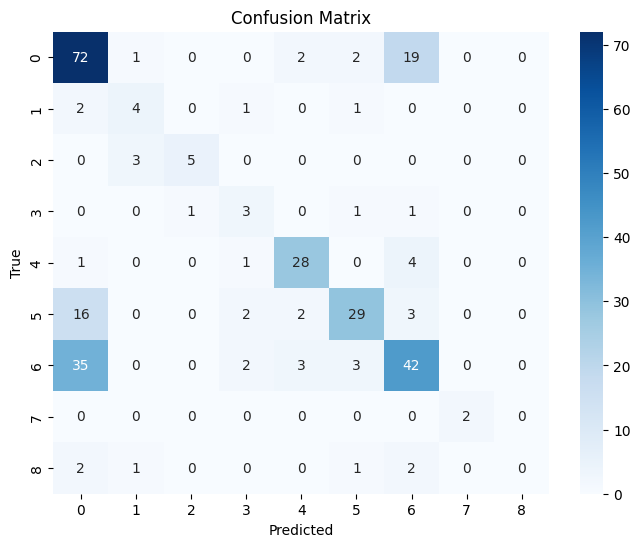

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [161]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(is_unbalance=True, random_state=42,verbosity=-1, min_child_samples=20, min_data_in_leaf=20)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using lLGBMClassifier', accuracy)
print(classification_report(y_test, y_pred))

Accuracy using lLGBMClassifier 0.5791245791245792
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        96
           2       0.67      0.50      0.57         8
           3       0.78      0.88      0.82         8
           4       0.29      0.33      0.31         6
           5       0.72      0.82      0.77        34
           6       0.56      0.48      0.52        52
           7       0.53      0.58      0.55        85
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         6

    accuracy                           0.58       297
   macro avg       0.46      0.46      0.46       297
weighted avg       0.57      0.58      0.57       297



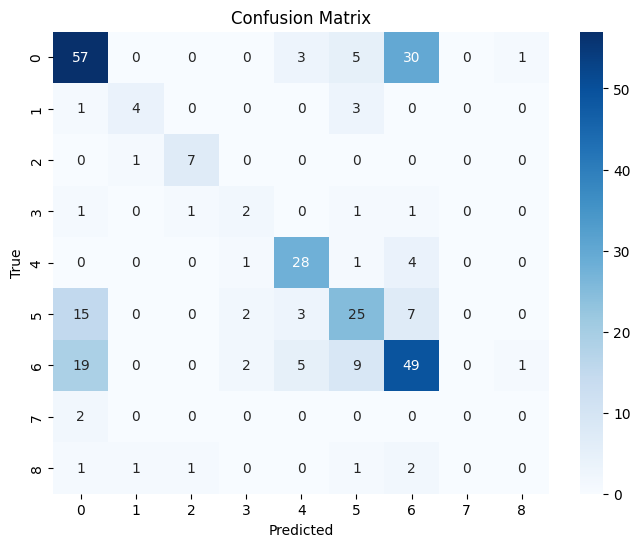

In [162]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [163]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy using Random Forest:", accuracy_rf)
print(classification_report(y_test, y_pred))


Accuracy using Random Forest: 0.6026936026936027
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        96
           2       0.67      0.50      0.57         8
           3       0.78      0.88      0.82         8
           4       0.29      0.33      0.31         6
           5       0.72      0.82      0.77        34
           6       0.56      0.48      0.52        52
           7       0.53      0.58      0.55        85
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         6

    accuracy                           0.58       297
   macro avg       0.46      0.46      0.46       297
weighted avg       0.57      0.58      0.57       297



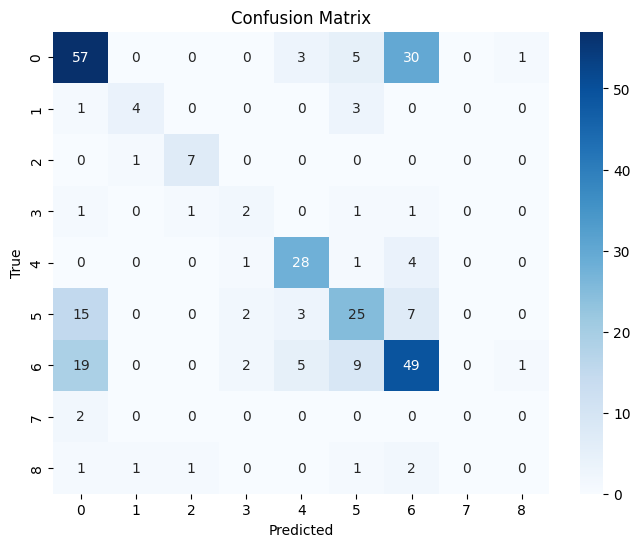

In [164]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Removing Outliers

In [165]:
import pandas as pd
import numpy as np

# Ensure X is a DataFrame
X = pd.DataFrame(X)

original_index = X.index
outlier_indices = set()

# IQR-based Outlier Detection
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outlier_indices.update(outliers.index)  # Collect all outlier indices

# Ensure y is a Series with correct indexing
y = pd.Series(y, index=original_index)

safe_indices = [idx for idx in outlier_indices if y[idx] != 1]

# Drop only safe outliers
X_cleaned = X.drop(index=safe_indices)
y_cleaned = y.drop(index=safe_indices)

print("New dataset shape after outlier removal:", X_cleaned.shape, y_cleaned.shape)
print("Class distribution after outlier removal:\n", y_cleaned.value_counts())


New dataset shape after outlier removal: (1081, 8) (1081,)
Class distribution after outlier removal:
 0    383
7    301
6    175
5    118
4     30
9     23
2     19
3     19
8      8
1      5
Name: count, dtype: int64


In [166]:

# Find Class 1 samples in X_cleaned
class_1_X = X_cleaned[y_cleaned == 1]
class_1_y = y_cleaned[y_cleaned == 1]

# Duplicate Class 1 samples 5 times
X_balanced = pd.concat([X_cleaned] + [class_1_X] * 5, ignore_index=True)
y_balanced = pd.concat([y_cleaned] + [class_1_y] * 5, ignore_index=True)

print("New class distribution:\n", y_balanced.value_counts())
print("Unique class labels:", set(y_balanced))


New class distribution:
 0    383
7    301
6    175
5    118
1     30
4     30
9     23
3     19
2     19
8      8
Name: count, dtype: int64
Unique class labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


SMOTE

In [167]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_balanced, y_balanced)
# Check class distribution after SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({6: 383, 7: 383, 0: 383, 3: 383, 2: 383, 4: 383, 5: 383, 9: 383, 1: 383, 8: 383})


Pre processing with new data

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [169]:
#svm
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using SVM:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy using SVM: 0.6840731070496083
              precision    recall  f1-score   support

           0       0.42      0.20      0.27        81
           1       1.00      1.00      1.00        74
           2       0.76      0.89      0.82        75
           3       0.93      0.97      0.95        77
           4       0.76      0.66      0.71        77
           5       0.71      0.87      0.78        78
           6       0.78      0.54      0.64        74
           7       0.51      0.42      0.46        78
           8       0.52      0.68      0.59        82
           9       0.44      0.63      0.52        70

    accuracy                           0.68       766
   macro avg       0.68      0.69      0.67       766
weighted avg       0.68      0.68      0.67       766



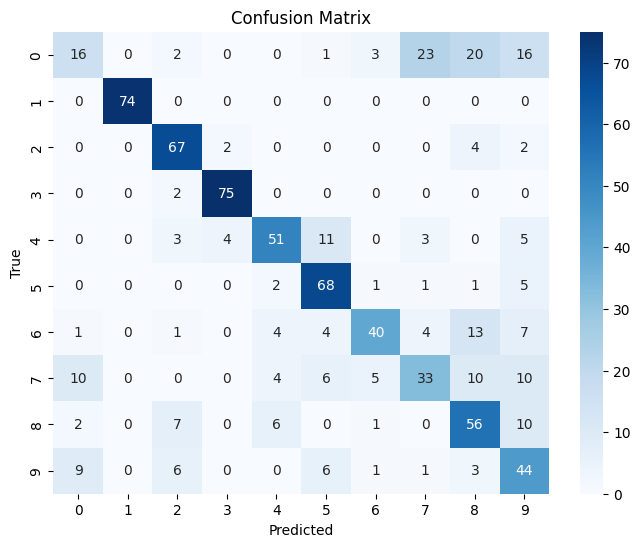

In [170]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [171]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(is_unbalance=True, random_state=42, verbosity=-1,min_child_samples=20, min_data_in_leaf=20)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy using lLGBMClassifier', accuracy)
print(classification_report(y_test, y_pred))

Accuracy using lLGBMClassifier 0.8616187989556136
              precision    recall  f1-score   support

           0       0.59      0.60      0.60        81
           1       1.00      1.00      1.00        74
           2       0.97      0.96      0.97        75
           3       0.99      1.00      0.99        77
           4       0.94      0.96      0.95        77
           5       0.88      0.91      0.89        78
           6       0.80      0.70      0.75        74
           7       0.58      0.63      0.60        78
           8       0.94      0.96      0.95        82
           9       0.98      0.90      0.94        70

    accuracy                           0.86       766
   macro avg       0.87      0.86      0.86       766
weighted avg       0.86      0.86      0.86       766



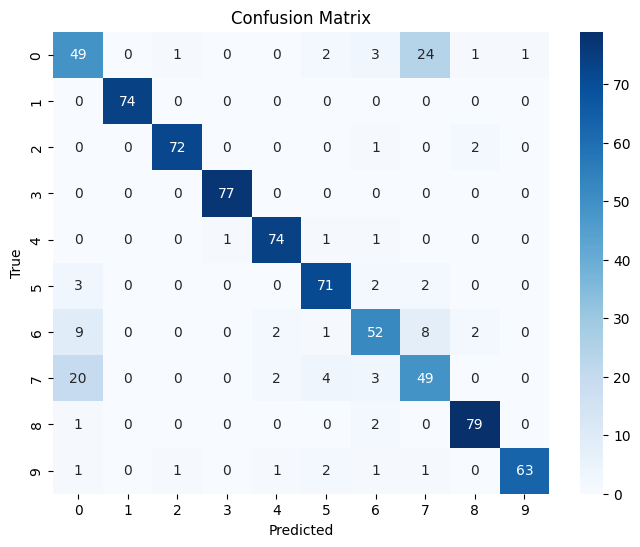

In [172]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [173]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy using Random Forest:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Accuracy using Random Forest: 0.8616187989556136
              precision    recall  f1-score   support

           0       0.64      0.59      0.62        81
           1       1.00      1.00      1.00        74
           2       0.91      0.97      0.94        75
           3       0.99      1.00      0.99        77
           4       0.92      0.94      0.93        77
           5       0.84      0.91      0.87        78
           6       0.80      0.77      0.79        74
           7       0.65      0.63      0.64        78
           8       0.91      0.96      0.93        82
           9       0.95      0.86      0.90        70

    accuracy                           0.86       766
   macro avg       0.86      0.86      0.86       766
weighted avg       0.86      0.86      0.86       766



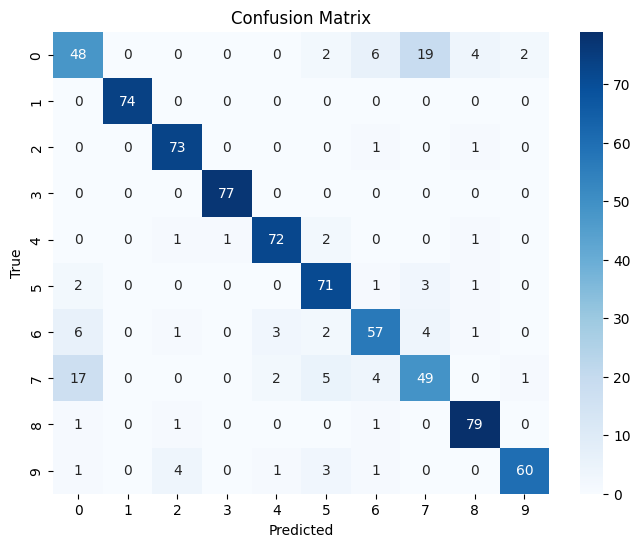

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Skewness and kurtosis

In [175]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

skewness = df[numeric_cols].apply(skew)
kurtosis_values = df[numeric_cols].apply(kurtosis)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis_values)

Skewness:
 mcg     0.603680
gvh     0.416218
alm    -0.220772
mit     1.443315
erl    10.149361
pox    10.266493
vac    -1.789829
nuc     2.410591
dtype: float64
Kurtosis:
 mcg      0.453474
gvh      0.550199
alm      1.599862
mit      2.278222
erl    101.009524
pox    105.378745
vac      9.465336
nuc      7.747540
dtype: float64


statistical tests

In [176]:

from scipy import stats
import numpy as np


features = [
    'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc'
]
target = 'name'
le = LabelEncoder()
df_clean[target] = le.fit_transform(df_clean[target])

X_train, X_test, y_train, y_test = train_test_split(
    df_clean[features], df_clean[target], test_size=0.2, random_state=42
)
models = {
    "LGBMClassifier": LGBMClassifier(is_unbalance=True, random_state=42, min_child_samples=20,verbosity=-1, min_data_in_leaf=20),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
}

results = {}
summary = {}

for model_name, model in models.items():
    print(f"\n{'='*30}\nModel: {model_name}\n{'='*30}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals, ddof=1)
    z_stat, z_p_value = stats.ttest_1samp(residuals, 0)
    t_stat, t_p_value = stats.ttest_1samp(residuals, 0)
    if model_name != "LGBMClassifier":
        f_stat = np.var(residuals) / np.var(results["LGBMClassifier"]["residuals"])
        f_p_value = stats.f.cdf(f_stat, len(residuals) - 1, len(results["LGBMClassifier"]["residuals"]) - 1)
    else:
        f_stat, f_p_value = None, None
    results[model_name] = {
        "mean_residual": mean_residual,
        "std_residual": std_residual,
        "z_test": (z_stat, z_p_value),
        "t_test": (t_stat, t_p_value),
        "f_test": (f_stat, f_p_value),
        "residuals": residuals
    }
    print(f"Mean Residual: {mean_residual}")
    print(f"Standard Deviation of Residuals: {std_residual}")
    print(f"Z-Test Statistic: {z_stat}, P-Value: {z_p_value}")
    print(f"T-Test Statistic: {t_stat}, P-Value: {t_p_value}")
    if f_stat is not None:
        print(f"F-Test Statistic: {f_stat}, P-Value: {f_p_value}")

# ANOVA Test: Comparing means of residuals across models
anova_f, anova_p = stats.f_oneway(
    results["LGBMClassifier"]["residuals"],
    results["Random Forest"]["residuals"],
    results["SVM"]["residuals"]
)
summary["ANOVA"] = {"F-Statistic": anova_f, "P-Value": anova_p}

# Type I & Type II Errors
type1_error = {model: 1 - results[model]["t_test"][1] for model in results}  # p-value interpretation
type2_error = {model: results[model]["t_test"][1] for model in results}  # 1 - power of test
summary["Type I Error"] = type1_error
summary["Type II Error"] = type2_error

# Determine the best model based on lowest mean residual
best_model = min(results, key=lambda k: abs(results[k]["mean_residual"]))
summary["Best Model"] = best_model

# Print Summary
print(f"\n{'='*30}\nSummary\n{'='*30}")
print("ANOVA F-Statistic:", anova_f)
print("ANOVA P-Value:", anova_p)
print("Type I Error (False Positive Rate):\n", type1_error)
print("Type II Error (False Negative Rate):\n", type2_error)
print(f"Best Model Based on Mean Residual: {best_model}")


Model: LGBMClassifier
Mean Residual: 0.09090909090909091
Standard Deviation of Residuals: 3.7903439971469144
Z-Test Statistic: 0.4133395029001524, P-Value: 0.6796571765973735
T-Test Statistic: 0.4133395029001524, P-Value: 0.6796571765973735

Model: Random Forest
Mean Residual: 0.08417508417508418
Standard Deviation of Residuals: 3.695731478128673
Z-Test Statistic: 0.39251962474792157, P-Value: 0.694956813410887
T-Test Statistic: 0.39251962474792157, P-Value: 0.694956813410887
F-Test Statistic: 0.9507001550269725, P-Value: 0.33195772401468654

Model: SVM
Mean Residual: 0.5286195286195287
Standard Deviation of Residuals: 3.564088305966253
Z-Test Statistic: 2.556071346426705, P-Value: 0.011085549314284857
T-Test Statistic: 2.556071346426705, P-Value: 0.011085549314284857
F-Test Statistic: 0.8841779057264912, P-Value: 0.14509773756333502

Summary
ANOVA F-Statistic: 1.418960873271315
ANOVA P-Value: 0.24251340446842928
Type I Error (False Positive Rate):
 {'LGBMClassifier': np.float64(0.320

In [177]:
import pickle
filename = 'model.pkl'
pickle.dump(rf_classifier, open(filename, 'wb'))
